<a href="https://colab.research.google.com/github/Mona6046/kaggle/blob/main/PredictSales/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
items_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/items.csv')
item_cat_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/item_categories.csv')
sales_train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sales_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')
shops_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/shops.csv')

In [ ]:
sales_train_df[sales_train_df['date']=='13.01.2013'].sort_values(by=['date'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
16,13.01.2013,0,25,2574,399.0,1.0
76715,13.01.2013,0,54,19899,149.0,2.0
76720,13.01.2013,0,54,19904,149.0,1.0
76744,13.01.2013,0,54,19597,149.0,1.0
76767,13.01.2013,0,54,19589,199.0,1.0
...,...,...,...,...,...,...
36834,13.01.2013,0,6,8093,1399.0,1.0
36849,13.01.2013,0,6,8173,349.0,1.0
36863,13.01.2013,0,6,7974,1999.0,1.0
36658,13.01.2013,0,6,8714,199.0,1.0


In [ ]:
sales_df=(sales_train_df.join(items_df, on='item_id', how='left',  rsuffix='r')).join(item_cat_df, on='item_category_id', how='left', rsuffix='r').join(shops_df, on='shop_id', how='left', rsuffix='r')

In [ ]:
sales_df['date']=pd.to_datetime(sales_df['date'], format='%d.%m.%Y', errors='coerce')
sales_df['fw']=sales_df['date'].dt.week
sales_df['fm']=sales_df['date'].dt.month
sales_df['fy']=sales_df['date'].dt.year
sales_df['wd']=sales_df['date'].dt.dayofweek
sales_df['sales']=sales_df['item_price']*sales_df['item_cnt_day']

In [ ]:
sales_df2= sales_df[['fm', 'sales']].groupby('fm').mean()
sales_df2['sales_mnthly_wt']=sales_df2['sales']/sales_df2['sales'].mean()

In [ ]:
sales_df3=sales_df.join(sales_df2, on='fm', how='left',  rsuffix='_mnthly_avg')

In [ ]:
sales_df2= sales_df[['shop_id', 'sales']].groupby('shop_id').mean()
sales_df2['sales_byShop_wt']=sales_df2['sales']/sales_df2['sales'].mean()
sales_df3=sales_df3.join(sales_df2, on='shop_id', how='left',  rsuffix='_byShop_avg')

In [ ]:
sales_df2= sales_df[['item_category_idr', 'sales']].groupby('item_category_idr').mean()
sales_df2['sales_byCat_wt']=sales_df2['sales']/sales_df2['sales'].mean()
sales_df3=sales_df3.join(sales_df2, on='item_category_idr', how='left',  rsuffix='_byCat_avg')

In [ ]:
sales_df3

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_idr,item_category_id,item_category_name,item_category_idr,shop_name,shop_idr,fw,fm,fy,wd,sales,sales_mnthly_avg,sales_mnthly_wt,sales_byShop_avg,sales_byShop_wt,sales_byShop_avg,sales_byShop_wt_byShop_avg,sales_byCat_avg,sales_byCat_wt
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,Кино - Blu-Ray,37,"Ярославль ТЦ ""Альтаир""",59,1,1,2013,2,999.00,1018.249426,0.871051,1074.061435,0.865140,1074.061435,0.865140,469.594921,0.186311
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,3,899.00,1018.249426,0.871051,1163.223635,0.936959,1163.223635,0.936959,1694.405696,0.672253
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,5,-899.00,1018.249426,0.871051,1163.223635,0.936959,1163.223635,0.936959,1694.405696,0.672253
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,Музыка - Винил,58,"Москва ТРК ""Атриум""",25,1,1,2013,6,1709.05,1018.249426,0.871051,1163.223635,0.936959,1163.223635,0.936959,1694.405696,0.672253
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,Музыка - CD фирменного производства,56,"Москва ТРК ""Атриум""",25,3,1,2013,1,1099.00,1018.249426,0.871051,1163.223635,0.936959,1163.223635,0.936959,1197.789885,0.475222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),7409,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,41,10,2015,5,299.00,1339.212020,1.145616,1163.223635,0.936959,1163.223635,0.936959,294.543527,0.116860
2935845,2015-10-09,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,7460,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,41,10,2015,4,299.00,1339.212020,1.145616,1163.223635,0.936959,1163.223635,0.936959,294.543527,0.116860
2935846,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,7459,55,Музыка - CD локального производства,55,"Москва ТРК ""Атриум""",25,42,10,2015,2,349.00,1339.212020,1.145616,1163.223635,0.936959,1163.223635,0.936959,294.543527,0.116860
2935847,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),7440,57,Музыка - MP3,57,"Москва ТРК ""Атриум""",25,43,10,2015,3,299.00,1339.212020,1.145616,1163.223635,0.936959,1163.223635,0.936959,283.134207,0.112333


In [ ]:
sales_df_cal=sales_df3[['date_block_num','shop_id','item_id','item_category_id','fm','sales','sales_mnthly_wt','sales_byShop_wt','sales_byCat_wt']]

In [ ]:
sales_df_cal

,date_block_num,shop_id,item_id,item_category_id,fm,sales,sales_mnthly_wt,sales_byShop_wt,sales_byCat_wt
0,0,59,22154,37,1,999.00,0.871051,0.865140,0.186311
1,0,25,2552,58,1,899.00,0.871051,0.936959,0.672253
2,0,25,2552,58,1,-899.00,0.871051,0.936959,0.672253
3,0,25,2554,58,1,1709.05,0.871051,0.936959,0.672253
4,0,25,2555,56,1,1099.00,0.871051,0.936959,0.475222
...,...,...,...,...,...,...,...,...,...
2935844,33,25,7409,55,10,299.00,1.145616,0.936959,0.116860
2935845,33,25,7460,55,10,299.00,1.145616,0.936959,0.116860
2935846,33,25,7459,55,10,349.00,1.145616,0.936959,0.116860
2935847,33,25,7440,57,10,299.00,1.145616,0.936959,0.112333


In [ ]:
sales_df3[sales_df3['fm']==2]['sales'].sum()/28

10167525.500714293

In [ ]:
(sales_df3[sales_df3['fm']==11]['sales'].sum()/31)/sales_df3['sales'].sum()/365

7.558807053006008e-06

In [ ]:
len(sales_df[sales_df['date_block_num']<31])

2774718

In [ ]:
df=sales_train_df

In [ ]:
train=df[0:2774718] 
test=df[2774718:]

In [ ]:
df.Timestamp = pd.to_datetime(df.date,format='%d.%m.%Y') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.date,format='%d.%m.%Y') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.date,format='%d.%m.%Y') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [ ]:
test

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2015-08-01,31.0,33.483907,10637.733484,1012.520553,1.102767
2015-08-02,31.0,32.930145,10718.376967,912.773877,1.114537
2015-08-03,31.0,33.255088,10721.988467,1011.340920,1.125509
2015-08-04,31.0,32.471583,10945.405277,939.071919,1.110961
2015-08-05,31.0,33.435024,10678.383600,1029.591723,1.084086
...,...,...,...,...,...
2015-10-27,33.0,32.960323,10284.361499,1376.826129,1.139603
2015-10-28,33.0,31.303716,10438.867528,1269.496111,2.902262
2015-10-29,33.0,31.735943,10529.662633,1195.664576,1.130961


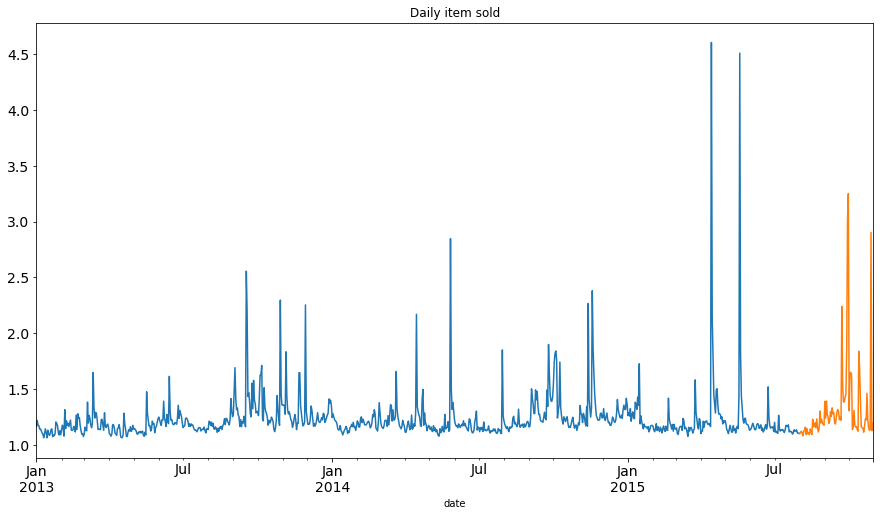

In [ ]:
#Plotting data
train.item_cnt_day.plot(figsize=(15,8), title= 'Daily item sold', fontsize=14)
test.item_cnt_day.plot(figsize=(15,8), title= 'Daily item sold', fontsize=14)
plt.show()

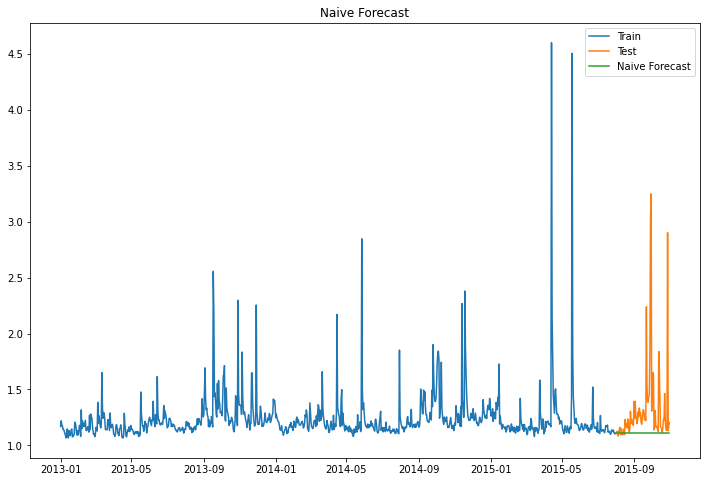

In [ ]:
#Naive method 
dd= np.asarray(train.item_cnt_day)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['item_cnt_day'], label='Train')
plt.plot(test.index,test['item_cnt_day'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.item_cnt_day, y_hat.naive))
print(rms)


0.42571493490256035


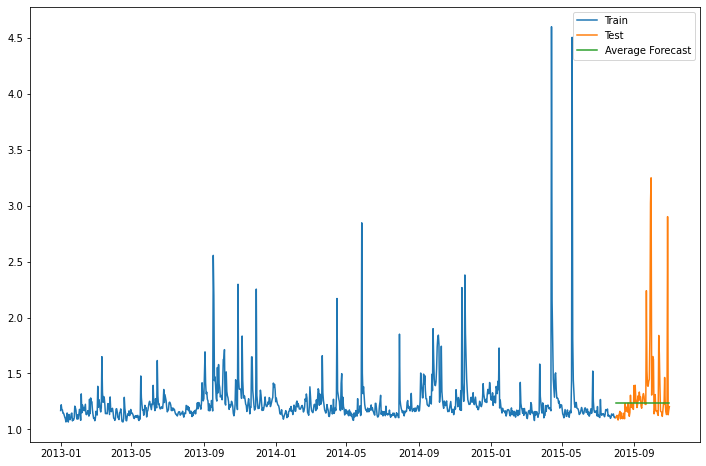

In [ ]:
#average 

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['item_cnt_day'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['item_cnt_day'], label='Train')
plt.plot(test['item_cnt_day'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(test.item_cnt_day, y_hat_avg.avg_forecast))
print(rms)


0.3797934616821925


In [ ]:
#moving average

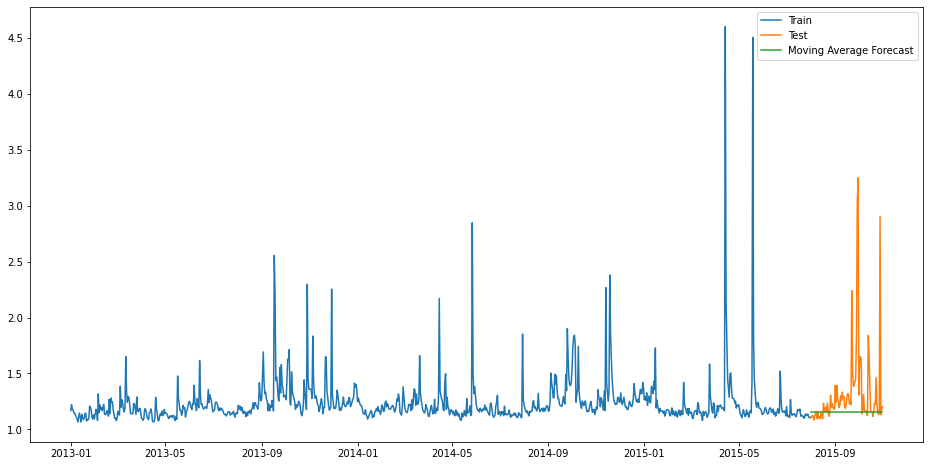

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['item_cnt_day'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['item_cnt_day'], label='Train')
plt.plot(test['item_cnt_day'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.item_cnt_day, y_hat_avg.moving_avg_forecast))
print(rms)


0.4047076492112632


In [ ]:
#exponential
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['item_cnt_day'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['item_cnt_day'], label='Train')
plt.plot(test['item_cnt_day'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

In [ ]:
rms = sqrt(mean_squared_error(test.item_cnt_day, y_hat_avg.SES))
print(rms)


AttributeError: ignored

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# In[ ]:


items = pd.read_csv('/content/drive/My Drive/Colab Notebooks/items.csv')
shops = pd.read_csv('/content/drive/My Drive/Colab Notebooks/shops.csv')
cats = pd.read_csv('/content/drive/My Drive/Colab Notebooks/item_categories.csv')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sales_train.csv')
# set index to ID to avoid droping it later
test  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv').set_index('ID')


# In[ ]:


plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)


# In[ ]:


train = train[(train.item_price < 300000 )& (train.item_cnt_day < 1000)]


# In[ ]:


#Remove any rows from train where item price is negative - these could be refunds. Also make zero and item_cnt_day values less than one, to remove negative values.
train = train[train.item_price > 0].reset_index(drop = True)
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0


# In[ ]:


#Several of the shops look like duplicates of each other. This could be down to shops re-opening or possibly moving store location on the same street or shopping centre.
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11


# In[ ]:


#Clean up some shop names and add 'city' and 'category' to shops df.
shops.loc[ shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"'
shops["city"] = shops.shop_name.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name.str.split(" ").map( lambda x: x[1] )
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"


# In[ ]:


#Only keep shop category if there are 5 or more shops of that category, the rest are grouped as "other".
category = []
for cat in shops.category.unique():
    if len(shops[shops.category == cat]) >= 5:
        category.append(cat)
shops.category = shops.category.apply( lambda x: x if (x in category) else "other" )


# # Cleaning Item Category Data

# In[ ]:


cats["type_code"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)
cats.loc[ (cats.type_code == "Игровые")| (cats.type_code == "Аксессуары"), "category" ] = "Игры"


# In[ ]:


category = []
for cat in cats.type_code.unique():
    if len(cats[cats.type_code == cat]) >= 5: 
        category.append( cat )
cats.type_code = cats.type_code.apply(lambda x: x if (x in category) else "etc")


# In[ ]:


from sklearn import preprocessing 
cats.type_code = preprocessing.LabelEncoder().fit_transform(cats.type_code)
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats["subtype_code"] = preprocessing.LabelEncoder().fit_transform( cats["subtype"] )
cats = cats[["item_category_id", "subtype_code", "type_code"]]


# # Cleaning Item Data

# In[ ]:


import re
def name_correction(x):
    x = x.lower() # all letters lower case
    x = x.partition('[')[0] # partition by square brackets
    x = x.partition('(')[0] # partition by curly brackets
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x) # remove special characters
    x = x.replace('  ', ' ') # replace double spaces with single spaces
    x = x.strip() # remove leading and trailing white space
    return x


# In[ ]:


# split item names by first bracket
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name1"], items["name3"] = items.item_name.str.split("(", 1).str

# replace special characters and turn to lower case
items["name2"] = items.name2.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()
items["name3"] = items.name3.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

# fill nulls with '0'
items = items.fillna('0')

items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))

# return all characters except the last if name 2 is not "0" - the closing bracket
items.name2 = items.name2.apply( lambda x: x[:-1] if x !="0" else "0")


# In[ ]:


items["type"] = items.name2.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[ items.type == "", "type"] = "mac"
items.type = items.type.apply( lambda x: x.replace(" ", "") )
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"
items.loc[ items.type == 'рs3' , "type"] = "ps3"


# In[ ]:


group_sum = items.groupby(["type"]).agg({"item_id": "count"})
group_sum = group_sum.reset_index()
drop_cols = []
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)
items.name2 = items.name2.apply( lambda x: "other" if (x in drop_cols) else x )
items = items.drop(["type"], axis = 1)


# In[ ]:


items.name2 = preprocessing.LabelEncoder().fit_transform(items.name2)
items.name3 = preprocessing.LabelEncoder().fit_transform(items.name3)
items.drop(["item_name", "name1"],axis = 1, inplace= True)
items.head()


# # Preprocessing

# In[ ]:


from itertools import product
import time
ts = time.time()
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( cols, inplace = True )
time.time()- ts


# In[ ]:


# add revenue to train df
train["revenue"] = train["item_cnt_day"] * train["item_price"]


# In[ ]:


ts = time.time()
group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)
time.time() - ts


# In[ ]:


#Create a test set for month 34..set_index('ID')
test  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)
test["item_cnt_month"] = test.item_id.astype(np.int16)


# In[ ]:





# In[ ]:


ts = time.time()
matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna( 0, inplace = True )
time.time() - ts


# In[ ]:


matrix.head()


# In[ ]:


items.head()


# In[ ]:


cats.head()


# In[ ]:


shops.head()


# In[ ]:


df_item_category = pd.merge(items,cats, on = ["item_category_id"], how = "left")


# In[ ]:


matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )


# In[ ]:


matrix['shop_category']= preprocessing.LabelEncoder().fit_transform(matrix.category)
matrix['shop_city']= preprocessing.LabelEncoder().fit_transform(matrix.city)
matrix.head()


# In[ ]:


matrix.drop(["city", "category"],axis = 1, inplace= True)


# In[ ]:


matrix = pd.merge(matrix, df_item_category, on = ["item_id"], how = "left")


# In[ ]:


#Add shop, items and categories data onto matrix df.
ts = time.time()
matrix["shop_city"] = matrix["shop_city"].astype(np.int8)
matrix["shop_category"] = matrix["shop_category"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subtype_code"] = matrix["subtype_code"].astype(np.int8)
matrix["name2"] = matrix["name2"].astype(np.int8)
matrix["name3"] = matrix["name3"].astype(np.int16)
matrix["type_code"] = matrix["type_code"].astype(np.int8)
time.time() - ts


# In[ ]:


matrix


# In[ ]:


df_matrix = matrix.copy()


# In[ ]:


df_matrix


# In[ ]:


#Feature Engineering
# Define a lag feature function
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df


# In[ ]:


cols  = ["date_block_num", "shop_id", "item_id"]
matrix.sort_values( cols, inplace = True )


# In[ ]:


ts = time.time()
matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )
time.time() - ts


# In[64]:


#Add the previous month's average item_cnt.
ts = time.time()
group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
matrix.date_avg_item_cnt = matrix["date_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1], ["date_avg_item_cnt"] )
matrix.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts


# In[69]:


matrix


# In[68]:


ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts


# In[70]:


ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subtype_avg_item_cnt'])
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts


# In[71]:


ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', "shop_city"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts


# In[72]:


ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts


# In[73]:


#Add average item price on to matix df.
#Add lag values of item price per month.
#Add delta price values - how current month average pirce relates to global average.
ts = time.time()
group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)


group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]

def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0

matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)
time.time() - ts


# In[74]:


#Add total shop revenue per month to matix df.
#Add lag values of revenue per month.
#Add delta revenue values - how current month revenue relates to global average.

ts = time.time()
group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)
time.time() - ts


# In[75]:


#Add month and number of days in each month to matrix df.
matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix["days"] = matrix["month"].map(days).astype(np.int8)


# In[76]:


#Add the month of each shop and item first sale.
ts = time.time()
matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')
time.time() - ts


# In[77]:


#Delete first three months from matrix. They don't have lag values.
ts = time.time()
matrix = matrix[matrix["date_block_num"] > 3]
time.time() - ts


# In[79]:


matrix.drop(['shop_name'],axis = 1, inplace= True)
matrix.head().T


# # Modelling

# In[81]:


import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


# In[97]:


data = matrix.copy()
del matrix
gc.collect()


# In[98]:


matrix = data.copy()


# In[99]:


data[data["date_block_num"]==34].shape


# In[100]:


#Use month 34 as validation for training.
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 3]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)


# In[101]:


Y_train = Y_train.clip(0, 20)
Y_valid = Y_valid.clip(0, 20)


# In[102]:


del data
gc.collect();


# In[103]:


ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=500,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

time.time() - ts


# In[132]:


Y_valid


# In[115]:


Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)


# In[93]:


submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)


# In[ ]:






item_cnt_month
date_avg_item_cnt
date_shop_item_avg_item_cnt
date_shop_subtype_avg_item_cnt
date_city_avg_item_cnt
date_item_city_avg_item_cnt
date_item_avg_item_price
